In [1]:
%reset -f
from brian2 import *
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import brian2.numpy_ as np
import datetime
import pickle
class Struct:
    pass
start_scope()

In [2]:
def rand_params(Parameter,Unit,N_Cells,Step):
    Nn = [int(N_Cells/2), N_Cells-int(N_Cells/2)] 
    shuffle(Nn)
    Base = int(1/Step)
    Start = int(Base*Parameter)
    Begin = Start - Nn[0]
    End = Start + Nn[1]
    Param_vector = [x / float(Base) for x in range(Begin, End, 1)]*Unit
    return Param_vector

In [3]:
N_noise = 5
tau_noise = 50*ms

### Create type of input

# type of input 'OU', 'DS', or 'const'
noisetype = 'OU' 

# Initial conditions



if noisetype == 'OU':
    eqs_noise_OU = '''
    dI/dt = (I0 - I)/tau_noise + sigma*xi*tau_noise**-0.5 : amp 
    I0 : amp
    sigma : amp
    weight : 1
    '''
elif noisetype == 'DS':
    #Noise double sine
    eq_sin = '''
            dI/dt = (sine_amplitude)*sine_frequency*cos(sine_frequency*t)
            +(sine2_amplitude)*sine2_frequency*cos(sine2_frequency*t) : amp
            sine_amplitude : amp
            sine_frequency: Hz
            sine2_amplitude : amp
            sine2_frequency : Hz
            '''
else:
    eq_const ='''
            dI/dt = 1.5*nA (const)        
    '''

Noise_const_1_5_nA = NeuronGroup(N_noise,eq_const,threshold='True',method='euler',name='Noise_const',dt=0.025*ms)
Noise_ds = NeuronGroup(N_noise,eq_sin,threshold='True',method='euler', name='Noise_ds',dt=0.025*ms)
Noise = NeuronGroup(N_noise, eqs_noise_OU, threshold = 'True', method='euler',name = 'Noise_OU',dt=0.025*ms)

Noise_statemon = StateMonitor(Noise, variables=['I','weight'], record=True,dt=0.025*ms)
Noise_ds_statemon = StateMonitor(Noise_ds, variables=['I'], record=True,dt=0.025*ms)
Noise_const_statemon = StateMonitor(Noise_const, variables=['I'], record=True,dt=0.025*ms)

In [4]:
Noise.I0 = 1.5*nA #rand_params(1.5,nA,N_noise,0.4)
Noise.I = 1.5*nA #rand_params(1.5,nA,N_noise,0.3)
Noise.sigma = 0.5*nA #rand_params(0.5,nA,N_noise,-0.3)

#frequency and amplitude of Sine#1
Noise_ds.sine_amplitude = 1*nA
Noise_ds.sine_frequency = 20*Hz*2*pi
# F and A of sine#2
Noise_ds.sine2_amplitude = 0.7*nA
Noise_ds.sine2_frequency = 33*Hz*2*pi

In [5]:
run(1*second)

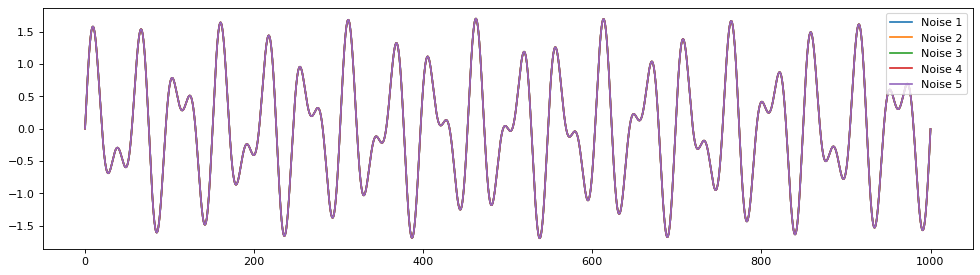

In [6]:
figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
for i in range(len(Noise_statemon.I)):
    plot(Noise_statemon.t/ms, Noise_ds_statemon.I[i]/nA, label='Noise '+str(i+1))
legend();
show()

In [7]:
class Struct:
    pass
Noise = Struct()

Noise.time = Noise_statemon.t/ms
Noise.I = Noise_ds_statemon.I

import numpy, scipy.io
local = datetime.datetime.now()
scipy.io.savemat('Noise_Time_Series_DS.mat', mdict={'Noise': Noise})   